In [1]:
import warnings
warnings.filterwarnings('ignore')
from sys import argv
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='ticks',color_codes=True)
import numpy as np
import pandas as pd
import scipy.stats as stats
import random
from scipy.stats import ttest_1samp,wilcoxon,shapiro,ttest_ind,mannwhitneyu,levene,bartlett
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chisquare,chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chisquare,chi2_contingency,f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.tsa.api as smt
from statsmodels.graphics.gofplots import ProbPlot
import pylab
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.stats import zscore
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering 

In [2]:
from datetime import datetime

In [3]:
data=pd.read_csv('latest.csv')
data.head()

,IMAGE,NEWACCT_NO,LINE_STAT,BILL_CYCL,DISTRICT,TENURE,CHURN_REASON,CHURN_GROUP,CURRENT_MTH_CHURN,COSTCENTRE,EFFC_STRT_DATE,EFFC_EXP_DATE
0,31-OCT-19,70045133.011.000008940,AC,1,TSING YI,226,NaN,NaN,N,SCFD,NaN,NaN
1,31-OCT-19,70045133.012.000009046,AC,1,TSING YI,226,NaN,NaN,N,SCFD,NaN,NaN
2,31-OCT-19,70045133.012.000046304,AC,1,TSING YI,226,NaN,NaN,N,SCFD,NaN,NaN
3,31-OCT-19,70045208.004.000008816,AC,1,KWUN TONG,226,NaN,NaN,N,SCFD,NaN,NaN
4,31-OCT-19,70046370.001.000013544,AC,1,TSING YI,225,NaN,NaN,N,SCFD,NaN,NaN


In [4]:
data.tail()

,IMAGE,NEWACCT_NO,LINE_STAT,BILL_CYCL,DISTRICT,TENURE,CHURN_REASON,CHURN_GROUP,CURRENT_MTH_CHURN,COSTCENTRE,EFFC_STRT_DATE,EFFC_EXP_DATE
30321,31-OCT-19,96475215.001.000096587,AC,1,TO KWA WAN,0,NaN,NaN,N,SCFY,28-OCT-19,27-OCT-21
30322,31-OCT-19,96475637.001.000096600,AC,1,NORTH POINT,0,NaN,NaN,N,SCFD,28-OCT-19,27-OCT-21
30323,31-OCT-19,96477005.001.000096618,AC,1,LAI CHI KOK,0,NaN,NaN,N,SCFY,29-OCT-19,28-OCT-21
30324,31-OCT-19,96478979.001.000060011,AC,1,TUEN MUN,0,NaN,NaN,N,SCFY,16-DEC-17,15-DEC-19
30325,31-OCT-19,96491923.001.000092262,AC,1,TSIM SHA TSUI,0,NaN,NaN,N,SCFY,04-DEC-18,03-DEC-20


In [5]:
data.shape

(30326, 12)

In [6]:
data.describe()

,BILL_CYCL,TENURE
count,30326.0,30326.000000
mean,1.0,82.985491
std,0.0,59.034381
min,1.0,0.000000
25%,1.0,32.000000
50%,1.0,67.000000
75%,1.0,130.000000
max,1.0,231.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30326 entries, 0 to 30325
Data columns (total 12 columns):
IMAGE                30326 non-null object
NEWACCT_NO           30326 non-null object
LINE_STAT            30326 non-null object
BILL_CYCL            30326 non-null int64
DISTRICT             30326 non-null object
TENURE               30326 non-null int64
CHURN_REASON         3328 non-null object
CHURN_GROUP          3328 non-null object
CURRENT_MTH_CHURN    30326 non-null object
COSTCENTRE           30326 non-null object
EFFC_STRT_DATE       23690 non-null object
EFFC_EXP_DATE        23690 non-null object
dtypes: int64(2), object(10)
memory usage: 2.8+ MB


In [8]:
data['TENURE_YEARS'] = data['TENURE']/12
data['TENURE_YEARS'] =data['TENURE_YEARS'].astype(int)
data.head(5)

,IMAGE,NEWACCT_NO,LINE_STAT,BILL_CYCL,DISTRICT,TENURE,CHURN_REASON,CHURN_GROUP,CURRENT_MTH_CHURN,COSTCENTRE,EFFC_STRT_DATE,EFFC_EXP_DATE,TENURE_YEARS
0,31-OCT-19,70045133.011.000008940,AC,1,TSING YI,226,NaN,NaN,N,SCFD,NaN,NaN,18
1,31-OCT-19,70045133.012.000009046,AC,1,TSING YI,226,NaN,NaN,N,SCFD,NaN,NaN,18
2,31-OCT-19,70045133.012.000046304,AC,1,TSING YI,226,NaN,NaN,N,SCFD,NaN,NaN,18
3,31-OCT-19,70045208.004.000008816,AC,1,KWUN TONG,226,NaN,NaN,N,SCFD,NaN,NaN,18
4,31-OCT-19,70046370.001.000013544,AC,1,TSING YI,225,NaN,NaN,N,SCFD,NaN,NaN,18


In [9]:
data.columns

Index(['IMAGE', 'NEWACCT_NO', 'LINE_STAT', 'BILL_CYCL', 'DISTRICT', 'TENURE',
       'CHURN_REASON', 'CHURN_GROUP', 'CURRENT_MTH_CHURN', 'COSTCENTRE',
       'EFFC_STRT_DATE', 'EFFC_EXP_DATE', 'TENURE_YEARS'],
      dtype='object')

In [10]:
data.IMAGE.value_counts()

31-OCT-19    26840
31-AUG-19      323
31-MAR-19      322
30-APR-19      322
30-SEP-19      315
30-JUN-19      314
31-JUL-19      296
30-NOV-18      291
31-MAY-19      271
28-FEB-19      271
31-OCT-18      266
31-DEC-18      251
31-JAN-19      244
Name: IMAGE, dtype: int64

In [11]:
data.LINE_STAT.value_counts()

AC    29052
IS     1274
Name: LINE_STAT, dtype: int64

In [12]:
data.DISTRICT.value_counts()

KWAI CHUNG            2876
KWUN TONG             2420
TSUEN WAN             2244
SHA TIN               1928
HUNG HOM              1756
TUEN MUN              1503
WAN CHAI              1354
TSIM SHA TSUI         1350
CENTRAL DISTRICT      1313
KOWLOON BAY           1095
CHEUNG SHA WAN        1046
MONG KOK               922
SHEUNG WAN             791
SAN PO KONG            779
CHAI WAN               690
NORTH POINT            677
TSING YI               673
CAUSEWAY BAY           619
YAU MA TEI             499
TSEUNG KWAN O          390
LAI CHI KOK            390
YUEN LONG              322
TSIM SHA TSUI EAST     305
TAI PO                 275
QUARRY BAY             253
SHAM SHUI PO           230
TIN SHUI WAI           223
TO KWA WAN             215
SHEUNG SHUI            209
ABERDEEN               206
                      ... 
NGAU TAU KOK            34
MID-LEVELS              33
SAU MAU PING            27
MA TAU KOK              24
SAI WAN HO              21
SAI KUNG                18
S

In [13]:
data.TENURE.value_counts()

62     831
46     498
47     477
27     328
14     317
24     299
31     294
28     282
5      282
18     280
11     277
157    276
19     270
41     269
4      264
12     262
16     261
15     255
13     252
17     252
7      250
23     249
25     244
60     242
40     237
173    236
42     231
32     230
48     230
75     229
      ... 
190     44
195     43
188     42
176     40
198     39
204     37
182     37
203     36
231     35
207     33
0       26
223     24
211     22
209     17
208     16
210     14
220     13
213     12
225      8
219      7
221      7
224      6
226      5
212      5
214      5
217      5
222      4
230      2
218      2
229      1
Name: TENURE, Length: 229, dtype: int64

In [14]:
data.CHURN_REASON.value_counts()

Downsizing / Cut cost                                                 1111
(R) Overdue Termination: Involuntary termination by credit control     553
Closing Business                                                       469
Relocate to non-coverage(w/prof)                                       257
No Reason Stated                                                       227
(R) Others                                                             199
Network Problem                                                        176
COM-Unsatisfy Service quality                                          103
No Use                                                                  74
Parallel Run Order                                                      40
Migration Order                                                         20
BILLING PROBLEM                                                         16
Sales Plan Not Attractive                                               14
Additional extra installa

In [15]:
data.CHURN_GROUP.value_counts()

Downsizing / Cut cost                             1111
(R) Overdue Termination                            553
Closing Business                                   469
Relocate to non-coverage(w/prof)                   257
No Reason Stated                                   227
(R) Others                                         199
Network Problem                                    176
COM-Unsatisfy Service quality                      103
No Use                                              74
Parallel Run Order                                  40
(R) Coverage Issue                                  22
Migration Order                                     20
BILLING PROBLEM                                     16
Sales Plan Not Attractive                           14
Additional extra installation charge (Part II)      12
(R) Customer Issue                                  10
UNSATISFY FIELD SERVICE SUPPORT                      8
LACK OF SERVICE FEATURES                             4
UNSATISFY 

In [16]:
data.CURRENT_MTH_CHURN.value_counts()

N    27009
Y     3317
Name: CURRENT_MTH_CHURN, dtype: int64

In [17]:
data.COSTCENTRE.value_counts()

SCFY    24854
SCFD     5472
Name: COSTCENTRE, dtype: int64

In [18]:
data.EFFC_STRT_DATE.value_counts()

01-OCT-17    358
15-JUN-18    250
01-APR-19    245
01-AUG-19    241
01-JUN-19    193
01-AUG-18    190
01-MAR-19    177
30-AUG-18    175
01-MAR-18    172
01-JUL-19    167
01-JUN-18    166
01-SEP-19    161
01-NOV-18    158
01-JAN-19    158
01-FEB-19    156
01-DEC-17    153
01-DEC-18    144
01-APR-18    135
01-SEP-18    134
01-FEB-18    128
01-MAY-19    123
01-OCT-19    110
01-JUL-18    110
01-MAY-18    101
01-OCT-18     84
01-JAN-18     69
21-JAN-19     66
30-APR-19     63
30-NOV-18     60
28-SEP-18     59
            ... 
06-NOV-17      1
26-MAY-16      1
03-AUG-16      1
03-JAN-17      1
29-JUL-17      1
16-DEC-16      1
11-OCT-16      1
11-NOV-16      1
27-FEB-16      1
26-JAN-17      1
12-AUG-17      1
23-FEB-17      1
05-JUN-17      1
05-JUL-16      1
04-NOV-17      1
04-APR-16      1
28-DEC-16      1
12-APR-17      1
04-FEB-16      1
27-JUN-17      1
02-SEP-17      1
17-SEP-17      1
21-DEC-15      1
19-JUN-17      1
30-APR-16      1
07-OCT-16      1
09-DEC-16      1
26-NOV-16     

In [19]:
data.EFFC_EXP_DATE.value_counts()

30-SEP-20    457
15-JUN-20    232
31-MAR-21    227
31-JUL-20    201
28-FEB-21    197
31-MAY-21    186
31-MAY-20    183
31-AUG-20    178
29-AUG-20    177
31-JUL-21    174
31-OCT-20    168
30-NOV-19    164
31-DEC-20    162
31-MAR-20    154
30-JUN-21    144
29-FEB-20    141
30-NOV-20    140
31-AUG-21    140
31-JAN-21    132
31-JAN-20    132
30-JUN-20    129
30-APR-21    118
30-APR-20    102
30-SEP-21    102
30-JUL-20     85
30-MAY-20     82
31-DEC-19     71
29-NOV-20     71
28-FEB-20     70
20-JAN-21     65
            ... 
15-MAR-22      1
23-JAN-22      1
10-MAR-22      1
03-APR-22      1
23-DEC-21      1
11-APR-23      1
23-FEB-22      1
06-OCT-22      1
22-SEP-22      1
25-JAN-23      1
24-MAR-22      1
27-OCT-22      1
07-DEC-22      1
20-DEC-22      1
08-DEC-21      1
30-AUG-27      1
12-MAY-22      1
09-MAR-22      1
06-MAR-22      1
24-MAR-23      1
26-SEP-28      1
01-MAY-22      1
05-OCT-22      1
30-MAY-22      1
20-SEP-22      1
17-JUN-22      1
26-MAR-22      1
24-SEP-22     

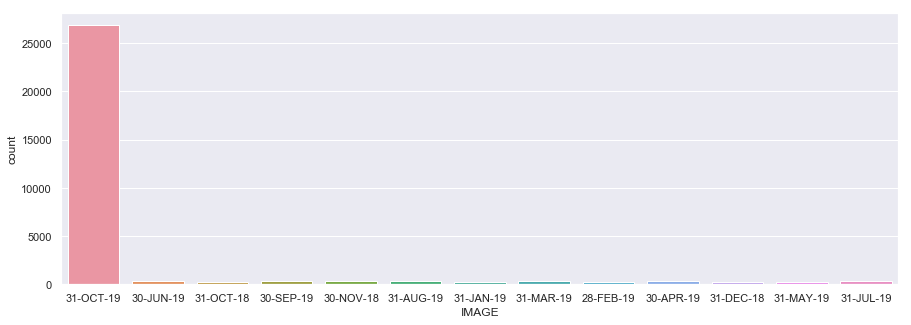

In [20]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(x="IMAGE", data=data)
plt.show()

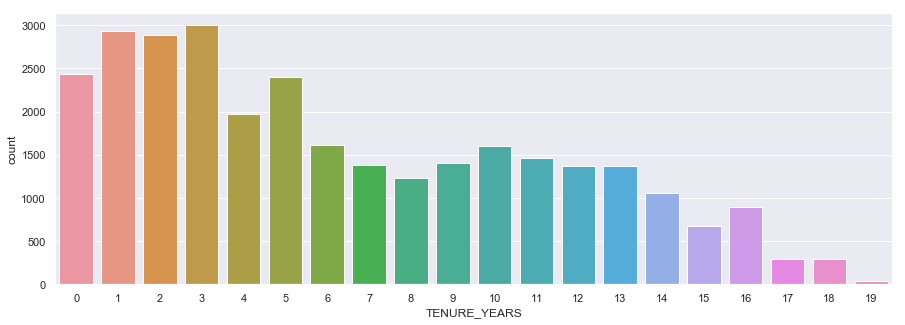

In [21]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(x="TENURE_YEARS", data=data)
plt.show()

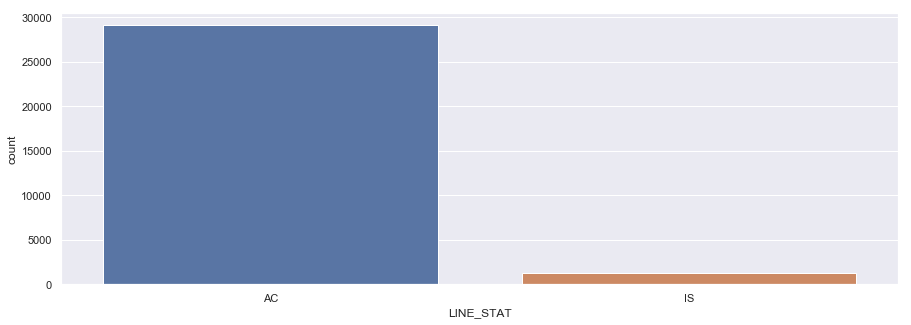

In [22]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(x="LINE_STAT", data=data)
plt.show()

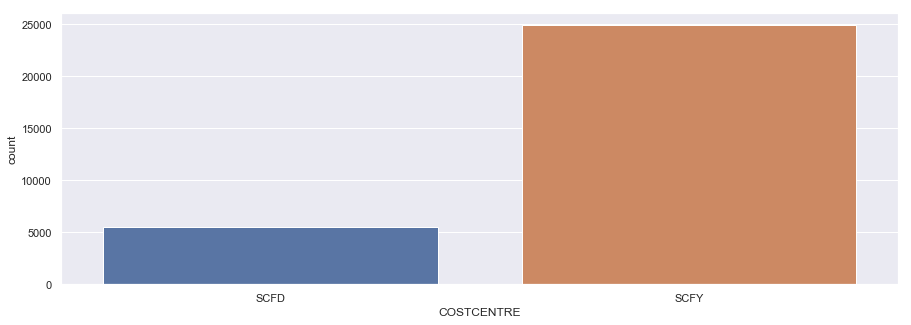

In [23]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(x="COSTCENTRE", data=data)
plt.show()

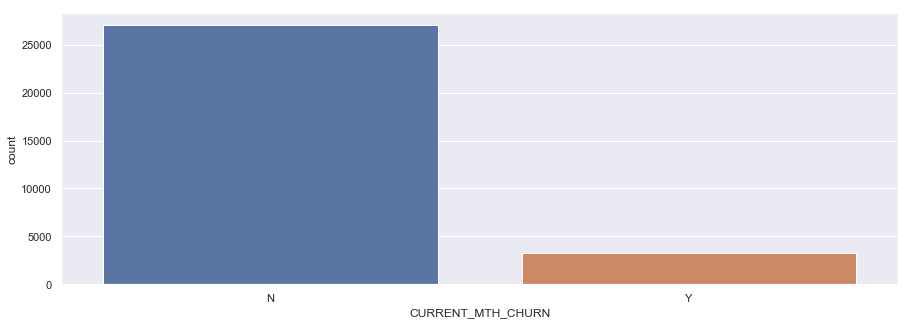

In [24]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(x="CURRENT_MTH_CHURN", data=data)
plt.show()

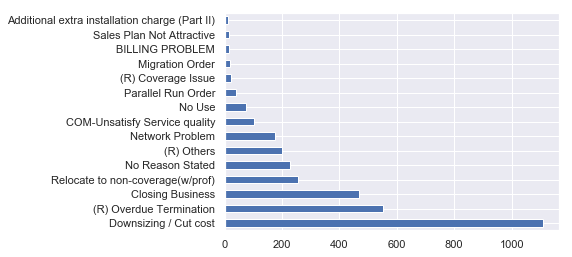

In [25]:
data['CHURN_GROUP'].value_counts()[:15].plot(kind='barh')

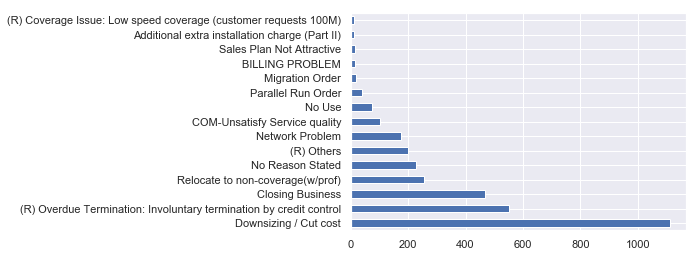

In [26]:
data['CHURN_REASON'].value_counts()[:15].plot(kind='barh')

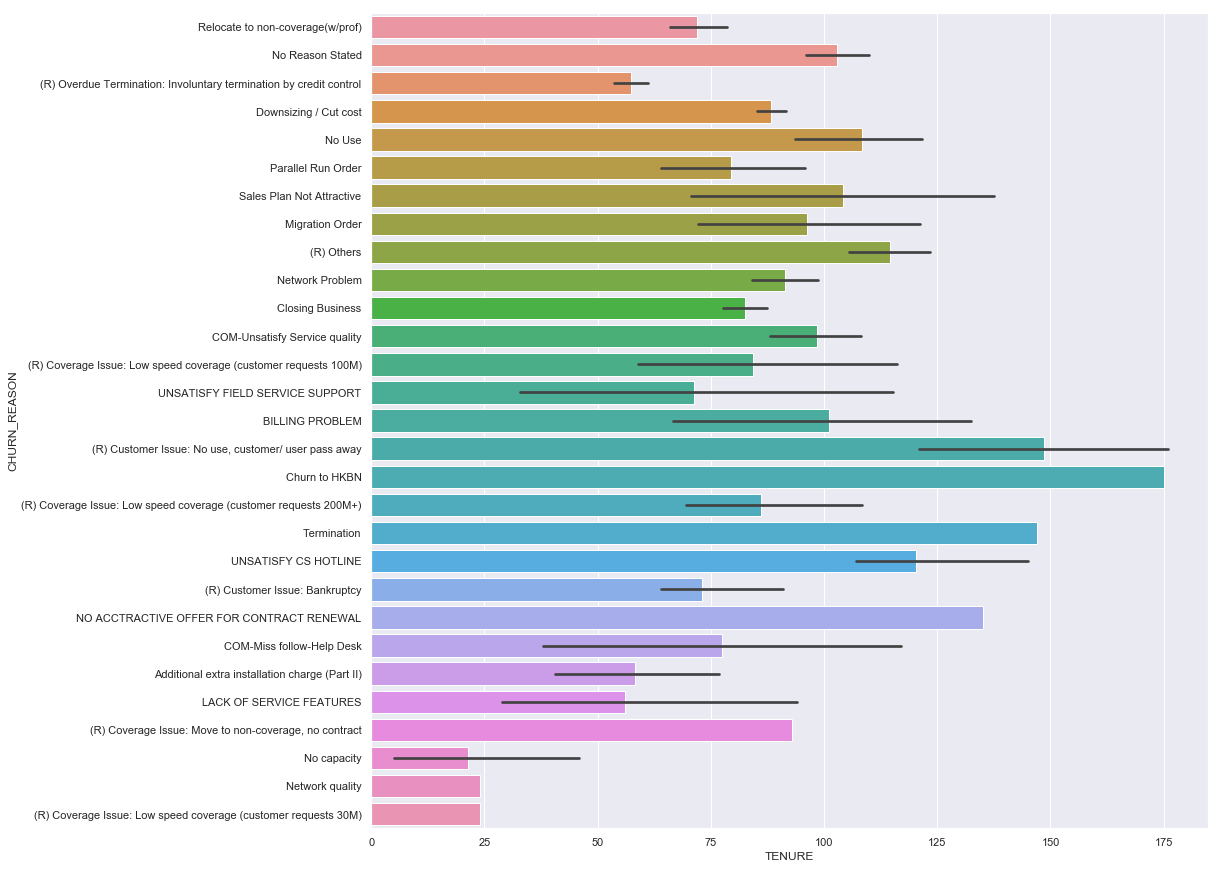

In [27]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,15))
sns.barplot(x="TENURE", y="CHURN_REASON", data=data)
plt.show()

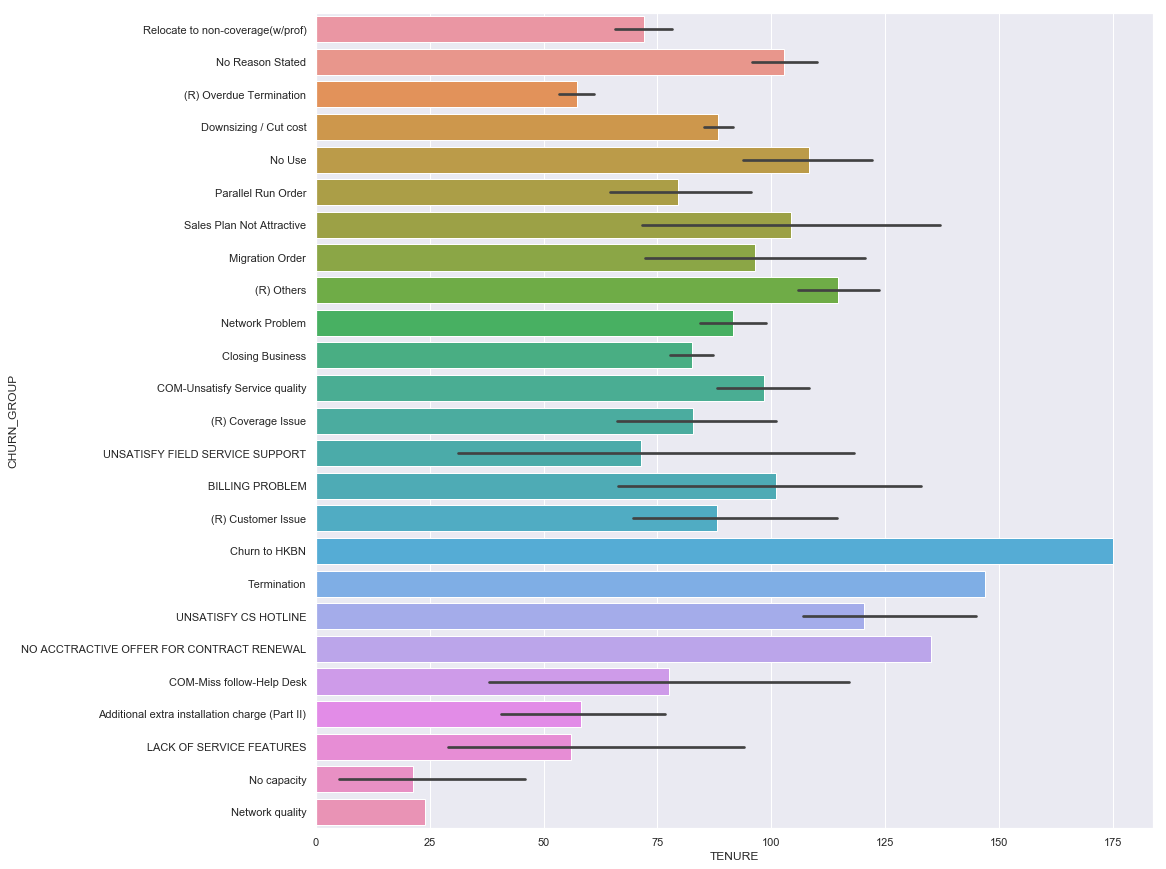

In [28]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,15))
sns.barplot(x="TENURE", y="CHURN_GROUP", data=data)
plt.show()

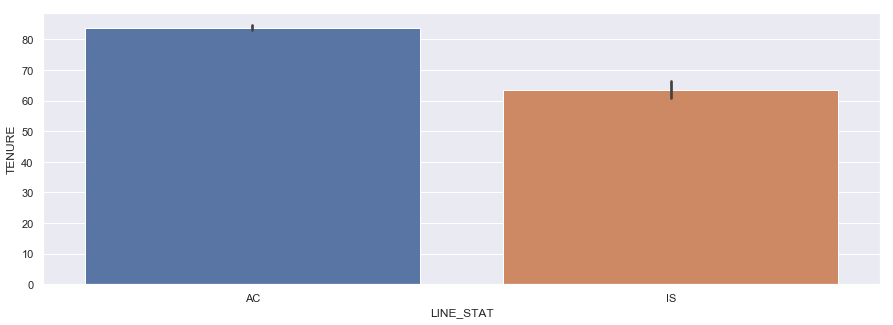

In [29]:

sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.barplot(y="TENURE", x="LINE_STAT", data=data)
plt.show()

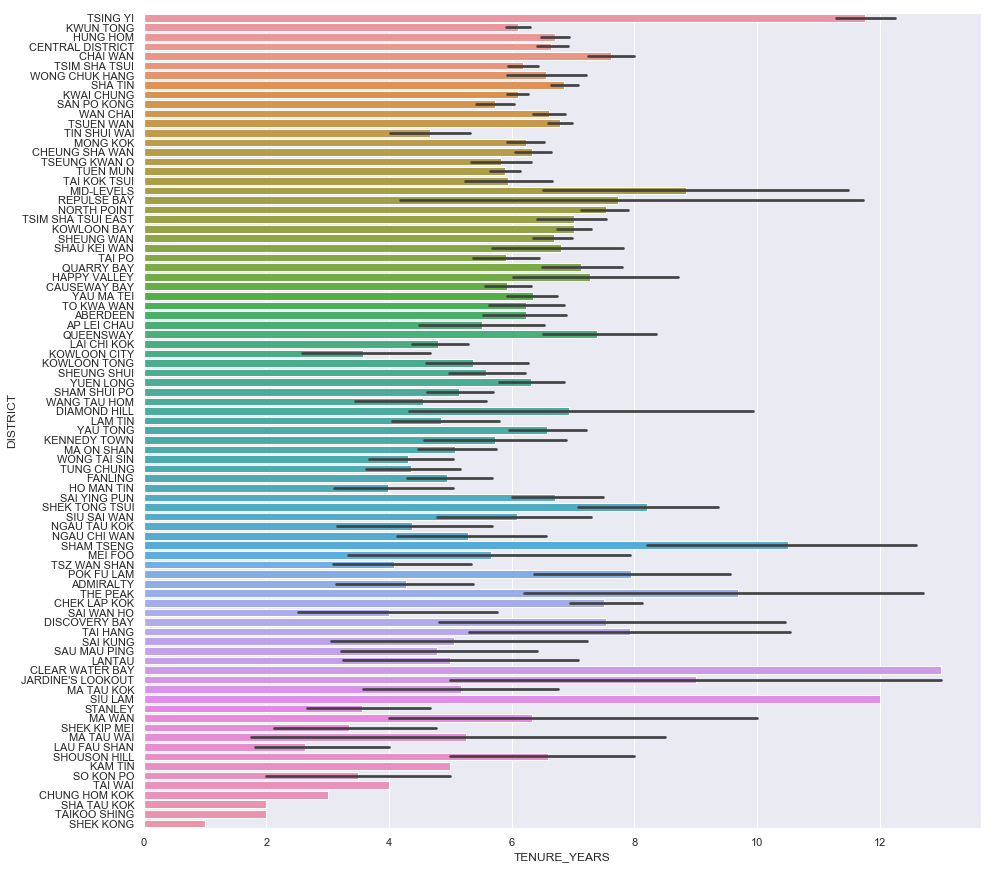

In [30]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,15))
sns.barplot(x="TENURE_YEARS", y="DISTRICT", data=data)
plt.show()

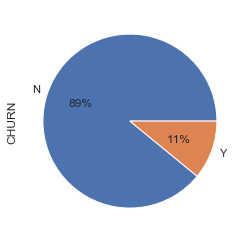

In [34]:
data.CURRENT_MTH_CHURN.str.get_dummies().sum().plot.pie(label='CHURN', autopct='%1.0000f%%')

In [35]:
label_encoder = preprocessing.LabelEncoder()
data['CURRENT_MTH_CHURN']= label_encoder.fit_transform(data['CURRENT_MTH_CHURN'])

In [39]:
data_churn = data.loc[data['CURRENT_MTH_CHURN'] == 1]

In [40]:
def diff_bar_new(x,y):
    data_churn.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(10,5))
    plt.xlabel(x,fontsize= 10)
    plt.ylabel('count',fontsize= 10)
    plt.legend(loc=0,fontsize= 10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 20)
    plt.show()

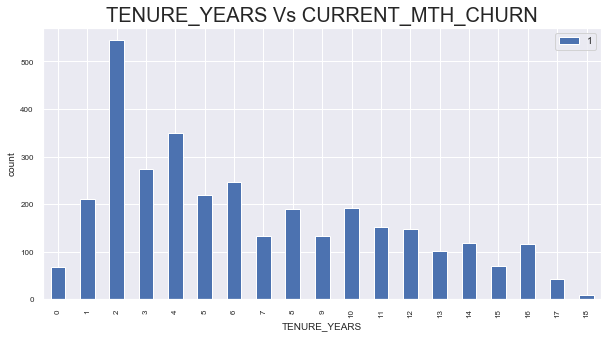

In [41]:
diff_bar_new('TENURE_YEARS','CURRENT_MTH_CHURN')

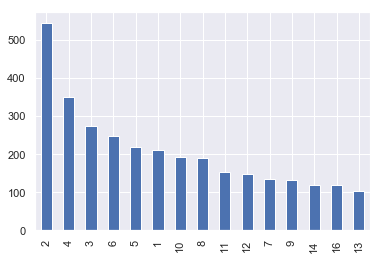

In [43]:
data_churn['TENURE_YEARS'].value_counts()[:15].plot(kind='bar')

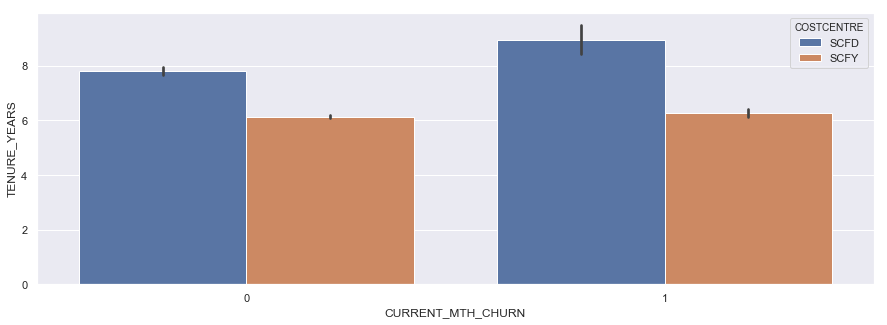

In [44]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.barplot(y="TENURE_YEARS", x="CURRENT_MTH_CHURN",hue="COSTCENTRE", data=data)
plt.show()

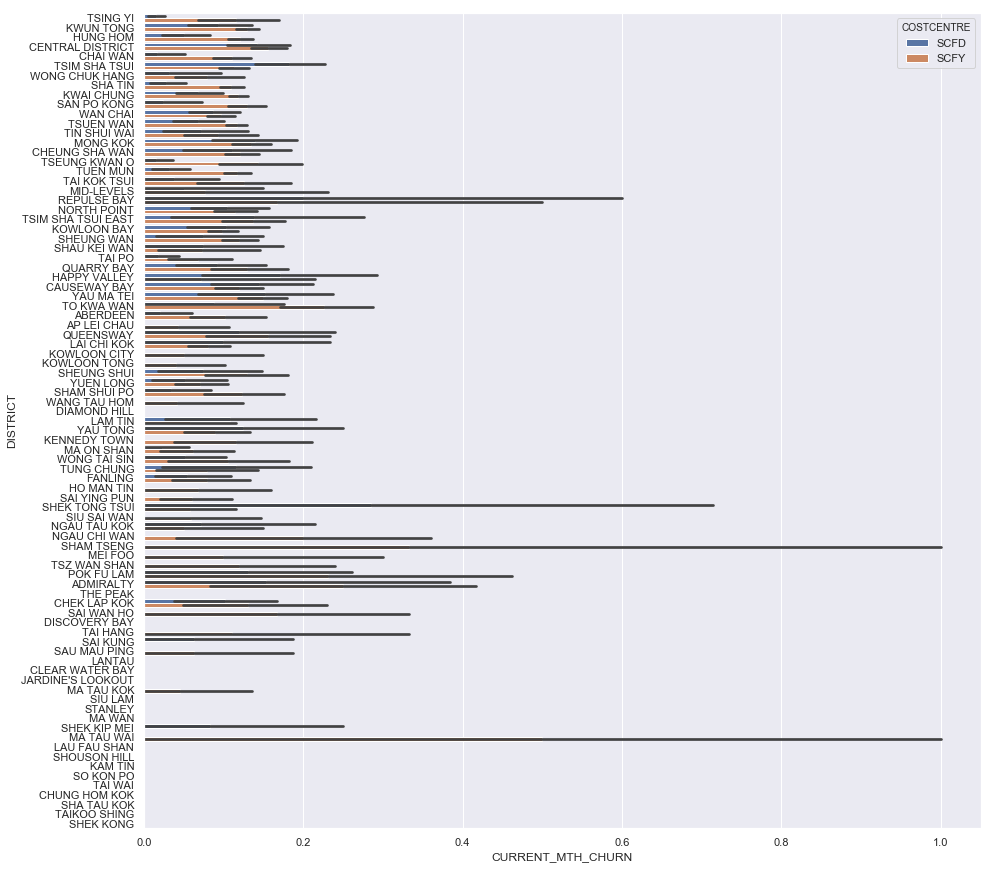

In [46]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,15))
sns.barplot(y="DISTRICT", x="CURRENT_MTH_CHURN",hue="COSTCENTRE", data=data)
plt.show()

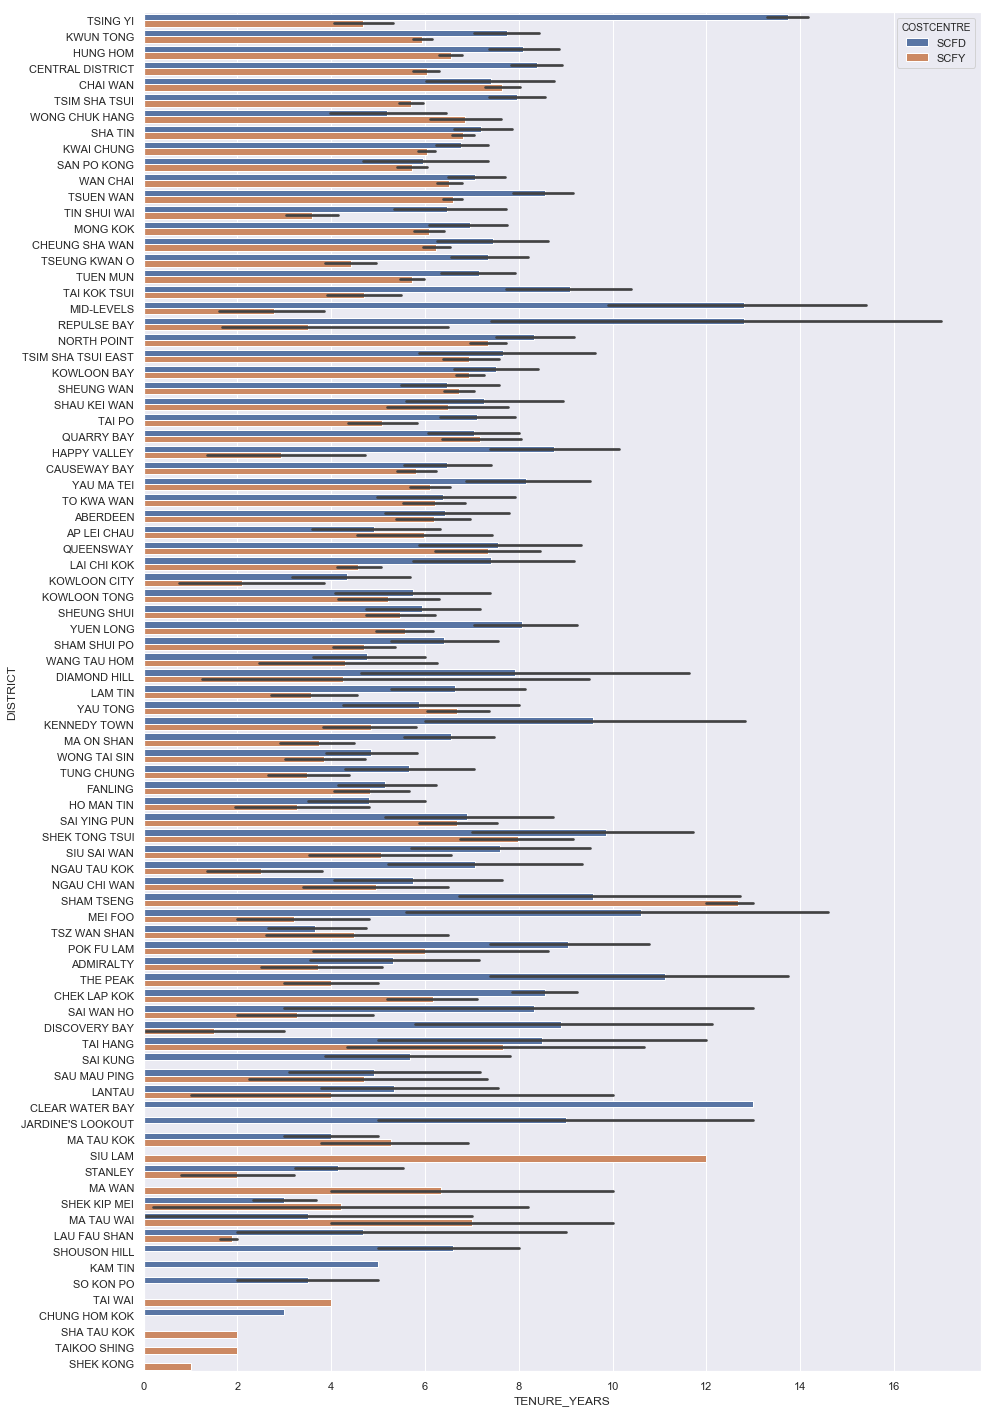

In [50]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,25))
sns.barplot(x="TENURE_YEARS", y="DISTRICT",hue="COSTCENTRE", data=data)
plt.show()

In [52]:
data_churn = data.loc[data['CURRENT_MTH_CHURN'] == 0]

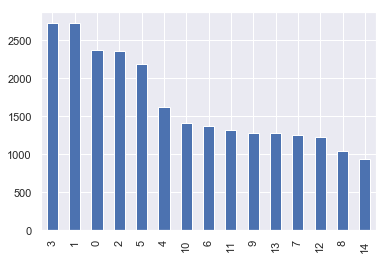

In [53]:
data_churn['TENURE_YEARS'].value_counts()[:15].plot(kind='bar')